In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
from matplotlib.colors import LogNorm

from ugali import isochrone

# Creating Isochrones

To use the isochrone module, you must have the isochrone library installed (see instructions [here](https://github.com/DarkEnergySurvey/ugali#installation)). The `isochrone` module provides an API to create isochrones and calculate various characteristics. The easiest way to create an isochrone is through the general factory interface shown below.

In [3]:
def plot_iso(iso):
    plt.scatter(iso.mag_1-iso.mag_2,iso.mag_1+iso.distance_modulus,marker='o',c='k')
    plt.gca().invert_yaxis()
    plt.xlabel('%s - %s'%(iso.band_1,iso.band_2)); plt.ylabel(iso.band_1)

Padova
  Parameters:
    distance_modulus : Parameter(17, [10.0, 30.0], False)
    age              : Parameter(12, [10.0, 12.0], False)
    metallicity      : Parameter(0.0002, [0.0001, 0.0002], False)
  Filename: /pbs/throng/lsst/users/tanugi/.ugali/isochrones/des/marigo2017/iso_a12.0_z0.00020.dat


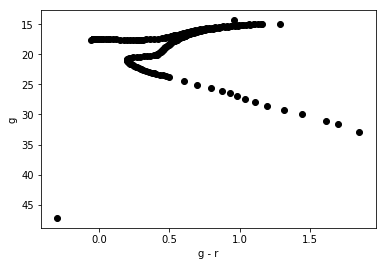

In [4]:
iso1 = isochrone.factory(name='Padova',
                        age=12,  # Gyr
                        metallicity=0.0002, # Z
                        distance_modulus=17
                       )
print(iso1)
plot_iso(iso1)

Padova
  Parameters:
    distance_modulus : Parameter(17, [10.0, 30.0], False)
    age              : Parameter(12, [10.0, 12.0], False)
    metallicity      : Parameter(0.0002, [0.0001, 0.0002], False)
  Filename: /pbs/throng/lsst/users/tanugi/.ugali/isochrones/des/marigo2017/iso_a12.0_z0.00020.dat


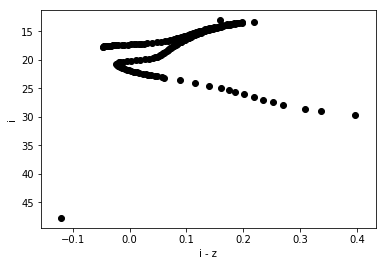

In [5]:
# Change the two bands that the isochrone loads
iso2 = isochrone.factory(name='Padova',
                        age=12,  # Gyr
                        metallicity=0.0002, # Z
                        distance_modulus=17,
                        band_1 = 'i',
                        band_2 = 'z'
                       )
print(iso2)
plot_iso(iso2)

Dotter
  Parameters:
    distance_modulus : Parameter(17, [10.0, 30.0], False)
    age              : Parameter(12, [10.0, 12.0], False)
    metallicity      : Parameter(0.0002, [0.0001, 0.0002], False)
  Filename: /pbs/throng/lsst/users/tanugi/.ugali/isochrones/des/dotter2016/iso_a12.0_z0.00020.dat


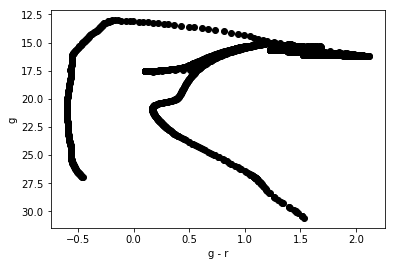

In [6]:
# Create a Dotter isochrone
iso3 = isochrone.factory(name='Dotter',
                        age=12,  # Gyr
                        metallicity=0.0002, # Z
                        distance_modulus=17
                       )
print(iso3)
plot_iso(iso3)

# Modifying Isochrones

Once you create an isochrone, you can modify it's parameters on the fly.

In [7]:
iso = isochrone.factory(name='Padova',
                        age=12,  # Gyr
                        metallicity=0.0002, # Z
                        distance_modulus=17
                       )

# You can set the age, metallicity, and distance modulus
iso.age = 11
iso.distance_modulus = 20
iso.metallicity = 0.00015
print(iso)

Padova
  Parameters:
    distance_modulus : Parameter(20, [10.0, 30.0], False)
    age              : Parameter(11, [10.0, 12.0], False)
    metallicity      : Parameter(0.00015, [0.0001, 0.0002], False)
  Filename: /pbs/throng/lsst/users/tanugi/.ugali/isochrones/des/marigo2017/iso_a10.0_z0.00010.dat


In [8]:
# Each parameter has bounds and will throw an error if you are outside the range (useful for fitting)
try:
    iso.distance_modulus = 40
except ValueError as e:
    print("Error:",e)
    
# However, you can increase the range
iso.params['distance_modulus'].set_bounds([10,50])
iso.distance_modulus = 40
print(iso)
iso.distance_modulus = 17

Error: Value outside bounds: 40 [10,30]
Padova
  Parameters:
    distance_modulus : Parameter(40, [10, 50], False)
    age              : Parameter(11, [10.0, 12.0], False)
    metallicity      : Parameter(0.00015, [0.0001, 0.0002], False)
  Filename: /pbs/throng/lsst/users/tanugi/.ugali/isochrones/des/marigo2017/iso_a10.0_z0.00010.dat


In [9]:
# Updating a parameters just changes the underlying isochrone file
# Note: There is no interpolation being done

for metal in [0.00011,0.00012,0.00013]:
    iso.metallicity = metal
    print("Metallicity:",iso.metallicity,iso.filename)
 
iso.metallicity = 0.000115
print("Metallicity:",iso.metallicity,iso.filename)

Metallicity: 0.00011 /pbs/throng/lsst/users/tanugi/.ugali/isochrones/des/marigo2017/iso_a10.0_z0.00010.dat
Metallicity: 0.00012 /pbs/throng/lsst/users/tanugi/.ugali/isochrones/des/marigo2017/iso_a10.0_z0.00010.dat
Metallicity: 0.00013 /pbs/throng/lsst/users/tanugi/.ugali/isochrones/des/marigo2017/iso_a10.0_z0.00010.dat
Metallicity: 0.000115 /pbs/throng/lsst/users/tanugi/.ugali/isochrones/des/marigo2017/iso_a10.0_z0.00010.dat


# Advanced Methods

The `Isochrone` class wraps several more complicated functions related to isochrones. A few examples are shown below.

(-0.5, 1.0)

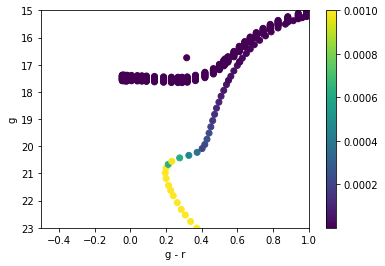

In [10]:
# Draw a regular grid of points from the isochrone with associated IMF
initial_mass,mass_pdf,actual_mass,mag_1,mag_2 = iso1.sample(mass_steps=1e2)

plt.scatter(mag_1-mag_2,mag_1+iso1.distance_modulus,c=mass_pdf,marker='o',facecolor='none',vmax=0.001)
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('%s - %s'%(iso.band_1,iso.band_2)); plt.ylabel(iso.band_1)
plt.ylim(23,15); plt.xlim(-0.5,1.0)

Text(0,0.5,'g')

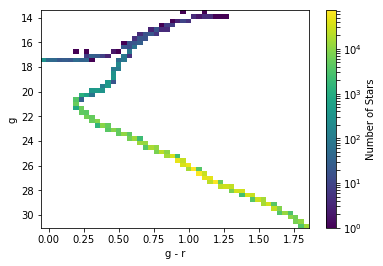

In [11]:
# Randomly sample stars from the isochrone pdf
# Note: `sample` returns the apparent magnitudes of stars
mag_1,mag_2 = iso1.simulate(stellar_mass=3e5)
n,bx,by,p = plt.hist2d(mag_1-mag_2,mag_2,bins=50,norm=LogNorm())
plt.colorbar(label="Number of Stars")
plt.gca().invert_yaxis()
plt.xlabel('%s - %s'%(iso.band_1,iso.band_2)); plt.ylabel(iso.band_1)

In [12]:
# The isochrone is normalized using a `richness` parameter (number of stars above a given mass threshold)
richness = 1e4
# Total stellar mass above some minimum mass
print("Stellar Mass:",richness * iso.stellar_mass())
# Luminosity calculated from the isochrone file and mass pdf
print("Stellar Luminosity:",richness * iso.stellar_luminosity())
# Calculate the richness 
print("Absolute Magnitude:",iso.absolute_magnitude(richness=richness))
# Calculate the absolute magnitude using the random sampling of Martin et al. 2008
print("Martin Absolute Magnitude:",iso.absolute_magnitude_martin(richness=richness))

Stellar Mass: 2444.703300559742
Stellar Luminosity: 2275.862945149175
Absolute Magnitude: -3.7149398323152742
Martin Absolute Magnitude: [-3.6783250936973135, [-3.4215436750382913, -3.9602712019887516]]
